In [2]:
import os
import ast
import random

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

BASE_DIR = "../data/"
print(os.listdir(BASE_DIR))

['.ipynb_checkpoints', 'copy_your_kaggle_data_here.txt', 'sample_submission.csv', 'test', 'test_tfrecords', 'train', 'train.csv', 'train_annotations.csv', 'train_tfrecords']


In [3]:
df_train = pd.read_csv(os.path.join(BASE_DIR, "train.csv"), index_col=0)
df_train.head()

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
StudyInstanceUID,,,,,,,,,,,,
1.2.826.0.1.3680043.8.498.26697628953273228189375557799582420561,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1.2.826.0.1.3680043.8.498.46302891597398758759818628675365157729,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
1.2.826.0.1.3680043.8.498.23819260719748494858948050424870692577,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
1.2.826.0.1.3680043.8.498.68286643202323212801283518367144358744,0,0,0,0,0,0,0,1,0,0,0,c31019814
1.2.826.0.1.3680043.8.498.10050203009225938259119000528814762175,0,0,0,0,0,0,0,0,0,1,0,207685cd1


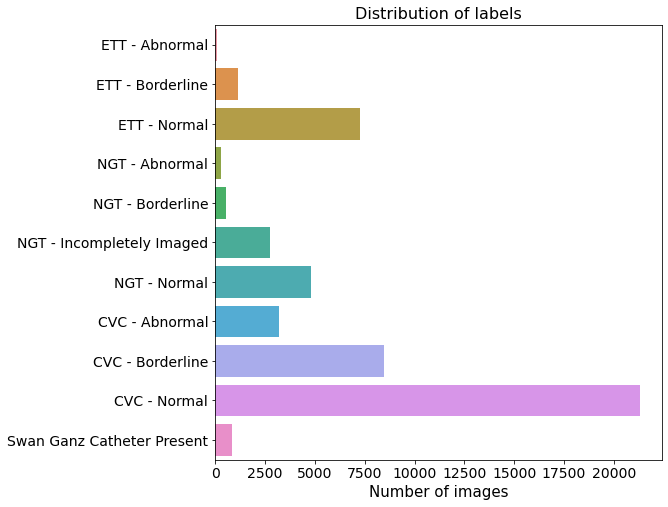

In [5]:
plt.figure(figsize=(8, 8))
df_tmp = df_train.iloc[:, :-1].sum()
sns.barplot(x=df_tmp.values, y=df_tmp.index)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of images", fontsize=15)
plt.title("Distribution of labels", fontsize=16);

**StudyInstanceUID** - unique ID for each image   
**ETT - Abnormal** - endotracheal tube placement abnormal   
**ETT - Borderline** - endotracheal tube placement borderline abnormal   
**ETT - Normal** - endotracheal tube placement normal   
**NGT - Abnormal** - nasogastric tube placement abnormal   
**NGT - Borderline** - nasogastric tube placement borderline abnormal   
**NGT - Incompletely Imaged** - nasogastric tube placement inconclusive due to imaging   
**NGT - Normal** - nasogastric tube placement borderline normal   
**CVC - Abnormal** - central venous catheter placement abnormal   
**CVC - Borderline** - central venous catheter placement borderline abnormal   
**CVC - Normal** - central venous catheter placement normal   
**Swan Ganz Catheter Present**   
**PatientID** - unique ID for each patient in the dataset   

In [8]:
print("Number of unique patients: ", df_train["PatientID"].unique().shape[0])
print("Total", df_train.shape[0])

Number of unique patients:  3255
Total 30083


<AxesSubplot:title={'center':'Number of Observations per Patient'}, ylabel='Frequency'>

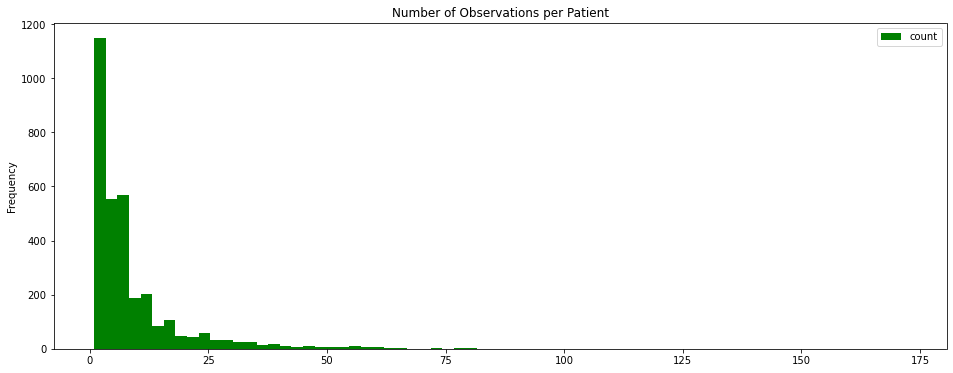

In [69]:
# plt.figure(figsize=(16, 6))

df_train_count = df_train
df_train_count["count"] = 1
df_count_observations = df_train_count.groupby(["PatientID"]).sum().reset_index()

df_count_observations = df_count_observations[['PatientID','count']].sort_values(by=['count'], ascending = False)
df_count_observations.plot.hist(x='PatientID', y='count', bins=70, figsize=(16,6), color='g', title='Number of Observations per Patient')

In [73]:
df_annot = pd.read_csv(os.path.join(BASE_DIR, "train_annotations.csv"))
df_annot.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


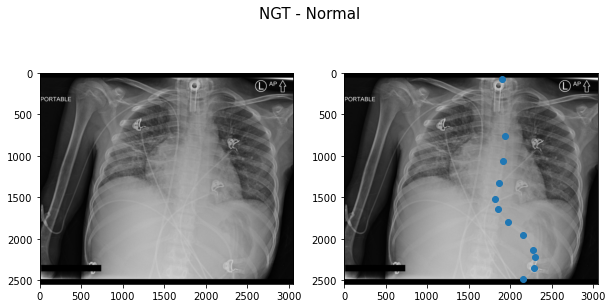

In [74]:
def plot_image_with_annotations(row_ind):
    row = df_annot.iloc[row_ind]
    image_path = os.path.join(BASE_DIR, "train", row["StudyInstanceUID"] + ".jpg")
    label = row["label"]
    data = np.array(ast.literal_eval(row["data"]))
    
    plt.figure(figsize=(10, 5))
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.scatter(data[:, 0], data[:, 1])
    
    plt.suptitle(label, fontsize=15)
    
plot_image_with_annotations(8)

In [86]:
import tensorflow as tf

file = r'../data/test_tfrecords/01-224.tfrec'
# on 
# to read TFRecord file use TFRecordDataset
raw_image_dataset = tf.data.TFRecordDataset(file)

# Create a dictionary describing the features.
image_feature_description = {
    "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
    "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }

# create a function to apply image feature description to each observation
def _parse_image_function(example_proto):
  # parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

# use map to apply this operation to each element of dataset
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)

# Use the .take method to only pull one example from the dataset.
for image_features in parsed_image_dataset.take(1):
    image = image_features['image'].numpy()
    display.display(display.Image(data=image))
    classes = image_features['class'].numpy()
    print('The label of image is', classes)

InvalidArgumentError: Feature: class (data type: int64) is required but could not be found.
	 [[{{node ParseSingleExample/ParseExample/ParseExampleV2}}]]